<a href="https://colab.research.google.com/github/Jaskirat1/AIT_NLP/blob/main/NLP_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [71]:
df = pd.read_csv('SMSCollection.csv', names=['labels','message'])

In [72]:
df.head()

,labels,message
0,Class,sms
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5573 non-null   object
 1   message  5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [74]:
df.drop(0)


,labels,message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [75]:
#df.reset_index(inplace = True)
#df.drop(columns = ['level_0', 'index'], axis = 1, inplace = True)
df

,labels,message
0,Class,sms
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [76]:
df.drop(0)


,labels,message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [77]:
df.reset_index(inplace = True)

In [78]:
df.drop(0, inplace = True)

In [79]:
df['labels'].unique()

array(['ham', 'spam'], dtype=object)

In [80]:
df.describe()

,index
count,5572.000000
mean,2786.500000
std,1608.642181
min,1.000000
25%,1393.750000
50%,2786.500000
75%,4179.250000
max,5572.000000


In [81]:
df.groupby('labels').describe()

index                                                              
         count        mean          std  min     25%     50%     75%     max
labels                                                                      
ham     4825.0  2794.21886  1604.618358  1.0  1410.0  2795.0  4185.0  5572.0
spam     747.0  2736.64257  1634.604866  3.0  1229.0  2720.0  4152.5  5568.0

In [82]:
df['length'] = df['message'].apply(len
                                   )

In [83]:
df.head()

,index,labels,message,length
1,1,ham,"Go until jurong point, crazy.. Available only ...",111
2,2,ham,Ok lar... Joking wif u oni...,29
3,3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,4,ham,U dun say so early hor... U c already then say...,49
5,5,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [84]:
df.drop(columns =['index'], axis = 1, inplace = True)

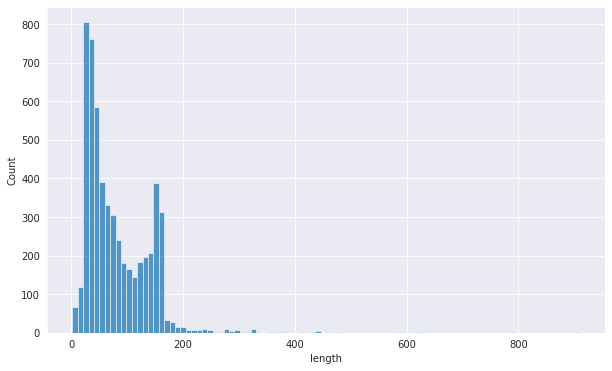

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='length')

In [86]:
df['length'].min()

2

In [87]:
df[df['length'] ==2]

,labels,message,length
1926,ham,Ok,2
3052,ham,Ok,2
4499,ham,Ok,2
5358,ham,Ok,2


In [88]:
df['length'].max()

910

In [89]:
df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c9c695910>,
      dtype=object)

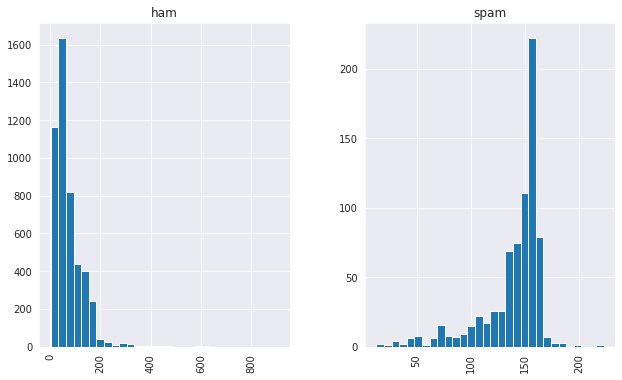

In [90]:
df.hist(column= 'length', by ='labels', bins = 30, figsize=(10,6))

Text Preprocessing

In [91]:
message= 'Hi, My name is Emma, How are you adam...'

In [92]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
no_punc= []

In [94]:
for char in message:
  print(char, end = '')

Hi, My name is Emma, How are you adam...

In [95]:
for char in message:
  if char not in string.punctuation:
    no_punc.append(char)

In [96]:
no_punc

['H',
 'i',
 ' ',
 'M',
 'y',
 ' ',
 'n',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'E',
 'm',
 'm',
 'a',
 ' ',
 'H',
 'o',
 'w',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'a',
 'd',
 'a',
 'm']

In [97]:
no_punc = ''.join(no_punc)


In [98]:
no_punc

'Hi My name is Emma How are you adam'

In [99]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
#nltk.download()

In [101]:
from nltk.corpus import stopwords

In [102]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
clean_message = []


In [104]:
for word in no_punc:
  print(word, end = "")

Hi My name is Emma How are you adam

In [105]:
for word in no_punc.split():
  if word.lower() not in stopwords.words('english'):
    clean_message.append(word)

In [106]:
clean_message

['Hi', 'name', 'Emma', 'adam']

In [107]:
def text_filtering(message):
  no_punc = [char for char in message if char not in string.punctuation]
  no_punc = ''.join(no_punc)
  clean_message = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
  return clean_message


In [108]:
text_filtering(message)

['Hi', 'name', 'Emma', 'adam']

Count Vectoriser --> TF-IDF --> Classification

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
bow_transformer = CountVectorizer(analyzer = text_filtering).fit(df['message'])

In [111]:
bow_transformer

CountVectorizer(analyzer=<function text_filtering at 0x7f7c9c740200>)

In [112]:
len(bow_transformer.vocabulary_)

11425

In [113]:
demo_message = df['message'][3]

In [114]:
print(demo_message)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [115]:
demo_bow = bow_transformer.transform([demo_message])

In [116]:
demo_bow

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [117]:
print(demo_bow)

  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1551)	1
  (0, 1833)	2
  (0, 1941)	1
  (0, 2804)	1
  (0, 3953)	1
  (0, 4731)	1
  (0, 5619)	1
  (0, 6331)	2
  (0, 6557)	1
  (0, 9159)	1
  (0, 9200)	1
  (0, 9252)	1
  (0, 10512)	1
  (0, 10686)	1
  (0, 11084)	1
  (0, 11123)	1


In [118]:
bow_transformer.vocabulary_['U']

4068

In [119]:
bow_transformer.vocabulary_['entry']

6331

In [120]:
bow_transformer.vocabulary_['FA']

1833

In [121]:
df_bow = bow_transformer.transform(df['message'])

In [122]:
df_bow

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [123]:
print(df_bow)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


TF-IDF

TF -> Term Frequency
IDF -> Inverse Document Frequency


In [124]:
from sklearn.feature_extraction.text import TfidfTransformer

In [125]:
tfid = TfidfTransformer().fit(df_bow)

In [126]:
df_tfidf = tfid.transform(df_bow)

In [127]:
df_tfidf.shape

(5572, 11425)

Classification

In [128]:
from sklearn.naive_bayes import MultinomialNB

In [129]:
model = MultinomialNB().fit(df_tfidf, df['labels'])

In [130]:
predictions = model.predict(df_tfidf)

In [131]:
from sklearn.metrics import classification_report

In [132]:
print(classification_report(df['labels'], predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



Pipeline

In [133]:
from sklearn.pipeline import Pipeline

In [138]:
pipe = Pipeline(
    [
        ('bow', CountVectorizer(analyzer = text_filtering)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultinomialNB()),
     
    ]
)

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(df['message'], df['labels'], test_size = 0.3, random_state = 2)

In [139]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_filtering at 0x7f7c9c740200>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [141]:
predictions = pipe.predict(X_test)

In [142]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1445
        spam       1.00      0.67      0.80       227

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672

